In [4]:
#!/usr/bin/evn python

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import copy
import os

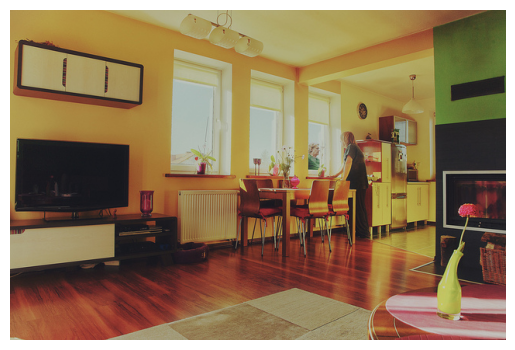

In [10]:
# read image
img_path = os.getcwd() + '/../Data/Train/1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

In [13]:
# obtain random patch
patch_width = 120
patch_height = 90

img_height, img_width, channel = img.shape
max_width = img_width - patch_width
max_height = img_height - patch_height

width_origin = random.randint(0, max_width)
height_origin = random.randint(0, max_height)
print(width_origin, height_origin)

387 274


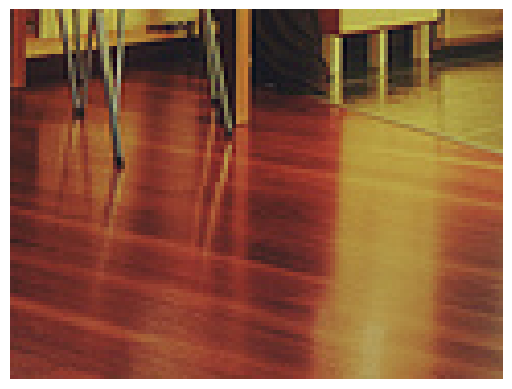

In [14]:
patch = img[height_origin: height_origin + patch_height,
            width_origin: width_origin + patch_width]
plt.axis('off')
plt.imshow(patch)

[(387, 274), (507, 274), (387, 364), (507, 364)]
[(387, 274), (507, 274), (387, 364), (507, 364)]
[(386, 271), (499, 280), (387, 356), (492, 352)]


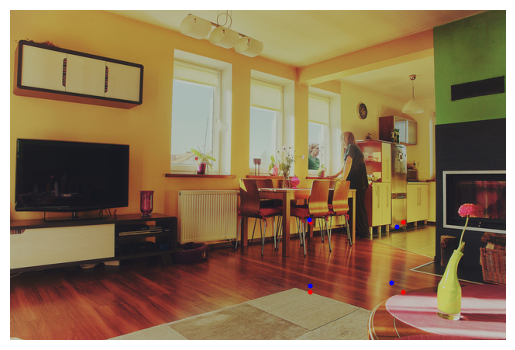

In [15]:
# add pertubation
noise = 15
top_left = (width_origin, height_origin)
top_right = (width_origin + patch_width, height_origin)
bottom_left = (width_origin, height_origin + patch_height)
bottom_right = (width_origin + patch_width, height_origin + patch_height)
corners = [top_left, top_right, bottom_left, bottom_right]
print(corners)
img_w_corner = copy.copy(img)

pertubrated_corners = []
for corner in corners:
    x = min(img_width, max(0, corner[0] + random.randint(-noise, noise)))
    y = min(img_height, max(0, corner[1] + random.randint(-noise, noise)))
    pertubrated_corner = (x, y)
    pertubrated_corners.append(pertubrated_corner)
    img_w_corner = cv2.circle(img_w_corner, corner, radius=3, color=(255, 0, 0), thickness=-1)
    img_w_corner = cv2.circle(img_w_corner, pertubrated_corner, radius=3, color=(0, 0, 255), thickness=-1)
print(corners)
print(pertubrated_corners)

plt.axis('off')
plt.imshow(img_w_corner)

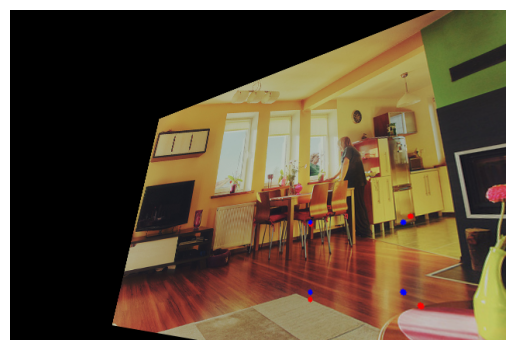

In [16]:
corners = np.float32(corners)
pertubrated_corners = np.float32(pertubrated_corners)

M = cv2.getPerspectiveTransform(corners, pertubrated_corners)
M_inv = np.linalg.inv(M)
img_transformed = cv2.warpPerspective(img, M_inv, (img_width, img_height))
img_transformed_w_corner = cv2.warpPerspective(img_w_corner, M_inv, (img_width, img_height))

plt.axis('off')
plt.imshow(img_transformed_w_corner)

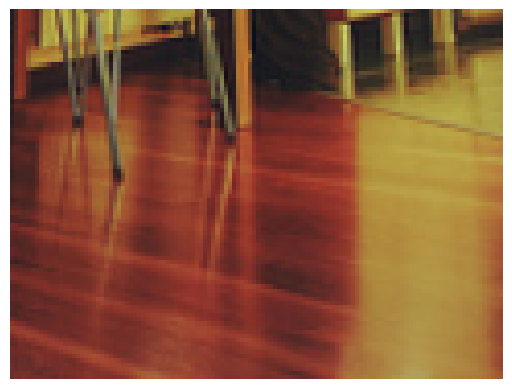

In [17]:
transformed_patch = img_transformed[height_origin: height_origin + patch_height,
                        width_origin: width_origin + patch_width]
plt.axis('off')
plt.imshow(transformed_patch)

In [18]:
label = pertubrated_corners - corners
print(label)

[[ -1.  -3.]
 [ -8.   6.]
 [  0.  -8.]
 [-15. -12.]]


In [24]:
# stack patches
stacked_img = np.dstack((patch, transformed_patch))

# path = "../Data/data_patch_train/patchB.png"
path = "./patchB.png"
cv2.imwrite(path, transformed_patch)

True